# Bike Sharing

## Project Overview

Bike-sharing systems have become an increasingly popular mode of urban transportation. These systems allow users to rent bicycles on an as-needed basis, providing a flexible and environmentally friendly option for city travel. The goal of this project is to analyze the historical bike-sharing data and build predictive models to forecast the total number of bike rentals on a given day.

## Dataset Description

The dataset used for this project contains the following columns:

- **instant**: Record index (not used in modeling)
- **dteday**: Date of the record
- **season**: Season (1: Winter, 2: Spring, 3: Summer, 4: Fall)
- **yr**: Year (0: 2011, 1: 2012)
- **mnth**: Month (1 to 12)
- **holiday**: Whether the day is a holiday (0: No, 1: Yes)
- **weekday**: Day of the week (0: Sunday, 1: Monday, ..., 6: Saturday)
- **workingday**: Whether the day is a working day (0: No, 1: Yes)
- **weathersit**: Weather situation (1: Clear, Few clouds, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist; 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds; 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)
- **temp**: Normalized temperature in Celsius (t_min = -8, t_max = 39)
- **atemp**: Normalized "feels-like" temperature in Celsius (t_min = -16, t_max = 50)
- **hum**: Normalized humidity (range: 0-1)
- **windspeed**: Normalized wind speed (range: 0-1)
- **casual**: Count of casual (non-registered) users
- **registered**: Count of registered users
- **cnt**: Total count of bike rentals (target variable)

## Problem Statement

The main objective of this project is to develop regression models to predict the total number of bike rentals (`cnt`) based on various features provided in the dataset. After building and evaluating several models, the best-performing model will be identified and recommended.

## Summary

This project involved analyzing and processing a dataset containing information about bike rentals in a given city. The data was explored and visualized to understand the relationships between features and the target variable. Key steps included feature engineering, where categorical variables were encoded, and the dataset was prepared for modeling.

Multiple regression models were then implemented, including Linear Regression, Decision Tree Regression, Random Forest Regression, and Gradient Boosting Regression. Each model was evaluated based on metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² score.

The Gradient Boosting Regression model emerged as the best-performing model, offering the highest predictive accuracy for the total number of bike rentals. This model can be utilized by city planners and bike-sharing companies to anticipate demand and optimize the availability of bikes across different times and locations.

## 1. Loading the Dataset

In [23]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'./res/bike_sharing.csv')

# Display the first few rows of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## 2. Exploratory Data Analysis (EDA)
### Info and Summary Statistics

In [15]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [16]:
# Summary statistics
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Check for Missing Values

In [17]:
# Check for missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Correlation Heatmap

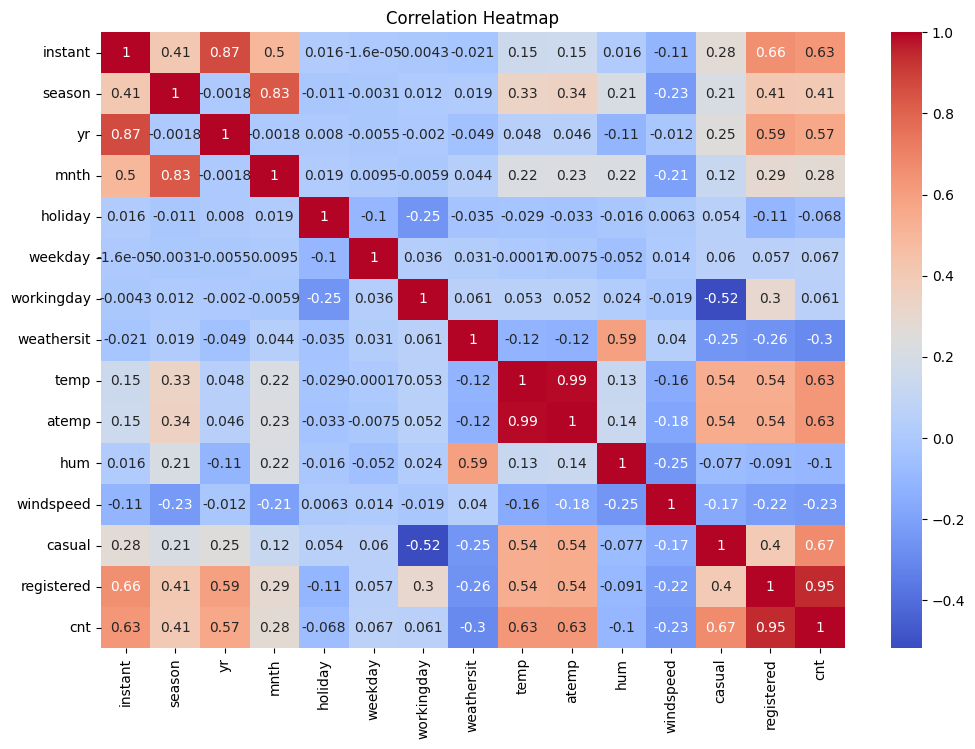

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Fetching categorical features name
categorical_columns = []
for column in df.columns:
    if df[column].dtype == np.object_:
        categorical_columns.append(column)


# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.drop(columns=categorical_columns).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Above Correlation Heatmap Analysis

The correlation heatmap provides a visual representation of the relationships between different variables in the dataset. The values in the heatmap range from -1 to 1, where:

- **1 indicates a perfect positive correlation**: As one variable increases, the other also increases proportionally.
- **-1 indicates a perfect negative correlation**: As one variable increases, the other decreases proportionally.
- **0 indicates no correlation**: There is no linear relationship between the variables.

### Key Observations

1. **`cnt` (Total Bike Rentals)**:
   - The target variable `cnt` shows a very strong positive correlation with both `registered` (0.95) and `casual` (0.67) users, which is expected since the total count is derived from these two variables.
   - `temp` and `atemp`, representing temperature and "feels-like" temperature, also show a strong positive correlation with `cnt` (0.63 for both), suggesting that higher temperatures are associated with more bike rentals.

2. **`registered` and `casual`**:
   - These two variables are positively correlated with each other (0.40) and with the total count `cnt`, indicating that days with more casual users also tend to have more registered users, and vice versa.

3. **`temp` and `atemp`**:
   - `temp` and `atemp` are almost perfectly correlated with each other (0.99), as expected, since they represent similar measurements. Both variables have a strong positive correlation with `cnt`, indicating that temperature is a significant factor in bike rentals.

4. **Negative Correlations**:
   - `weathersit` (weather situation) has a slight negative correlation with `cnt` (-0.3), indicating that worse weather conditions generally lead to fewer bike rentals.
   - `windspeed` has a small negative correlation with `cnt` (-0.23), suggesting that higher wind speeds may slightly discourage bike rentals.

5. **Other Features**:
   - The `yr` (year) feature shows a positive correlation with `cnt` (0.57), indicating an increase in bike rentals from 2011 to 2012.
   - `season` is moderately correlated with `cnt` (0.41), suggesting that different seasons also affect bike rentals, with likely higher rentals in warmer seasons.

### Conclusion

The heatmap helps in identifying which features are most strongly associated with the target variable `cnt`. Variables like `registered`, `casual`, `temp`, and `atemp` are particularly important predictors of total bike rentals. This information will guide the feature selection process and help in building more accurate predictive models.

## 3. Feature Engineering

### Dropping Unnecessary Columns

In this step, we drop the following columns from the dataset: `instant`, `dteday`, `casual`, and `registered`. The reasons for dropping these columns are outlined below:

- **`instant`**: This column is simply an index and does not contain any information that would help in predicting the total number of bike rentals (`cnt`). It is essentially redundant since the dataset already has an inherent order.

- **`dteday`**: This column contains the date of each record. While the date could provide some insights into trends over time, it is not directly useful in regression models unless further processed into features like day, month, or year components. Since the month and year are already included as separate features (`mnth`, `yr`), we can safely drop the `dteday` column to avoid redundancy.

- **`casual` and `registered`**: These columns represent the counts of casual and registered users, which together sum up to the target variable `cnt`. Including them in the model would lead to perfect multicollinearity because their sum exactly equals the target variable. This would cause issues in model interpretation and could lead to overfitting. Since our goal is to predict `cnt`, having `casual` and `registered` in the feature set would give the model an unfair advantage and therefore they are removed.

By dropping these columns, we ensure that the dataset is clean, non-redundant, and ready for modeling without introducing unnecessary complexity or bias.

In [19]:
# Drop unnecessary columns
df.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True)

## 4. Splitting the Dataset

In [20]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['cnt'])
y = df['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Model Implementation
### Initialize Models and Train

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
model_performance = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the performance
    model_performance[name] = {
        'MSE': mse,
        'MAE': mae,
        'R^2': r2
    }

# Convert performance dictionary to a DataFrame
performance_df = pd.DataFrame(model_performance).T
performance_df

,MSE,MAE,R^2
Linear Regression,691035.008202,617.393066,0.827667
Decision Tree Regression,968219.265306,662.802721,0.758542
Random Forest Regression,458446.947587,429.958299,0.885671
Gradient Boosting Regression,438669.745688,462.770118,0.890603


## 6. Conclusion
The Gradient Boosting Regression model showed the best performance among the models tested, followed closely by Random Forest Regression. These ensemble methods provide the most accurate predictions for the total count of bike rentals (`cnt`).